ML Function
Random Forest
Multi Layer Perceptron
Support Vector Classifier
KNN


In [38]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score
from sklearn.model_selection import cross_validate
import matplotlib.pyplot as plt
from sklearn.neural_network import MLPClassifier
from sklearn import svm
from sklearn import neighbors
from sklearn.tree import export_graphviz
from subprocess import call
from IPython.display import Image
from subprocess import call

def ML(X_train, X_test, Y_train, Y_test):
    print('Random Forest')
    RFclassifier = RandomForestClassifier(n_estimators=100)
    RFclassifier.fit(X_train, Y_train.ravel())
    Y_Pred_RF = RFclassifier.predict(X_test)
    count = 0
    M, N = X_test.shape
    print(M)
    for N in range(M):
        if Y_Pred_RF[N] == Y_test[N]:
            count = count + 1        
    print(count)
    accuracy = 0
    accuracy = count/M
    estimator = RFclassifier.estimators_[5]
    #export_graphviz(estimator, out_file='tree.dot', 
    #            feature_names = ["mem", "temp", "tasks", "volt", "cpu"],
    #            class_names = ["0","1"],
    #            rounded = True, proportion = False, 
    #            precision = 2, filled = True)
    #call(['dot', '-Tpng', 'tree.dot', '-o', 'tree.png', '-Gdpi=600'])
    #Image(filename = 'tree.png')

    print(accuracy)
    print('')
    print('')
    print('MLP')
    MLPclassifier = MLPClassifier(random_state = np.random.RandomState(), max_iter = 1000, shuffle = True)
    MLPclassifier.fit(X_train, Y_train.ravel())
    Y_Pred_MLP = MLPclassifier.predict(X_test)
    count = 0
    M, N = X_test.shape
    print(M)
    for N in range(M):
        if Y_Pred_MLP[N] == Y_test[N]:
            count = count + 1
            
    print(count)
    accuracy = 0
    accuracy = count/M
    print(accuracy)
    #print('')
    #print('')
    #print('SVC')
    #SVCclassifier = svm.SVC(gamma = 'auto')
    #SVCclassifier.fit(X_train, Y_train.ravel())
    #Y_Pred_SVC = SVCclassifier.predict(X_test)
    #count = 0
    #M, N = X_test.shape
    #print(M)
    #for N in range(M):
    #    if Y_Pred_SVC[N] == Y_test[N]:
    #        count = count + 1
            
    #print(count)
    #accuracy = 0
    #accuracy = count/M
    #print(accuracy)
    print('')
    print('')
    print('KNN')
    KNNclassifier = neighbors.KNeighborsClassifier()
    KNNclassifier.fit(X_train, Y_train.ravel())
    Y_Pred_KNN = KNNclassifier.predict(X_test)
    count = 0
    M, N = X_test.shape
    print(M)
    for N in range(M):
        if Y_Pred_KNN[N] == Y_test[N]:
            count = count + 1
            
    print(count)
    accuracy = 0
    accuracy = count/M
    print(accuracy)
    return RFclassifier, Y_Pred_RF, MLPclassifier, Y_Pred_MLP, KNNclassifier, Y_Pred_KNN

Here I import the data sets, the Host data every 5 seconds and Netflows for each of the devices.
The labels and data have been split in preperation for being fed into the classifiers
in the NetwFlow data the start and end timestamps of each flow have been removed as I believe the ML would just use the timestamp to identify the anomolous and non-anomoulous flows. 

In [39]:
import os
import pandas as pd
import shutil
import numpy as np
from sklearn.preprocessing import StandardScaler


def DataProcess(path):
    HostDataFiles = os.listdir(path + "/HostData-5s")
    NetFlowFiles = os.listdir(path + "/NetFlow")
    Host = pd.DataFrame([])
    NetFlow = pd.DataFrame([])
    for j in HostDataFiles:
        df = pd.read_csv(path+ "/HostData-5s/" + j)  
        df = df[["mem", "temp", "time", "tasks", "volt", "cpu", "Label"]]
        del df['time'] 
        df = df[['Label'] + [c for c in df if c not in ['Label']]]
        Host = Host.append(df)
    for j in NetFlowFiles:
        df = pd.read_csv(path + "/NetFlow/" + j, index_col=0 )    
        del df['ts']
        del df['te']
        df = df[['Label'] + [c for c in df if c not in ['Label']]]
        NetFlow = NetFlow.append(df)
    HostLabel = np.array(Host.iloc[:, :1])
    NetFlowLabel = np.array(NetFlow.iloc[:, :1])
    scaler = StandardScaler()
    HostData = np.array(Host.iloc[:, 1:])
    da = np.array(HostData)
    Host = scaler.fit_transform(HostData)
    NetFlowData = np.array(NetFlow.iloc[:, 1:])  
    return HostLabel, NetFlowLabel, HostData, NetFlowData


MC Data

In [40]:
from sklearn.model_selection import train_test_split

MCHostTargets, MCNetFlowTargets, MCHostInputs, MCNetFlowInputs = DataProcess("C:/Users/james/Downloads/MC/MC")

SCHostTargets, SCNetFlowTargets, SCHostInputs, SCNetFlowInputs = DataProcess("C:/Users/james/Downloads/SC/SC")

STHostTargets, STNetFlowTargets, STHostInputs, STNetFlowInputs = DataProcess("C:/Users/james/Downloads/ST/ST")

HostTargets = np.concatenate((MCHostTargets, SCHostTargets, STHostTargets), axis = 0)
NetFlowTargets = np.concatenate((MCNetFlowTargets, SCNetFlowTargets, STNetFlowTargets), axis = 0)
HostInputs = np.concatenate((MCHostInputs, SCHostInputs, STHostInputs), axis = 0)
NetFlowInputs = np.concatenate((MCNetFlowInputs , SCNetFlowInputs , STNetFlowInputs ), axis = 0)
print(MCHostTargets.shape)
print(SCHostTargets.shape)
print(HostTargets.shape)



arr = []
ordinalEncoding = {}
count = 0
for i in NetFlowInputs:
    if i[5] not in ordinalEncoding:
        ordinalEncoding[i[5]] = count
        count += 1
    #arr.append([i[3],i[4],ordinalEncoding[i[5]]])
    arr.append([i[3],i[4]])
NetFlowInputsCut = np.array(arr)



print(NetFlowInputsCut.shape)


X_Host_train, X_Host_test, Y_Host_train, Y_Host_test = train_test_split(HostInputs, HostTargets, test_size=0.25, random_state=42, shuffle=True)
X_train, X_test, Y_train, Y_test = train_test_split(NetFlowInputsCut, NetFlowTargets, test_size=0.25, random_state=42, shuffle=True)

(2611, 1)
(2730, 1)
(8068, 1)
(1724406, 2)


classifier Tests

In [41]:
print("****************************************************************************")
print("Host")
RFclassifierHost, Y_Pred_RFHost, MLPclassifierHost, Y_Pred_MLPHost, KNNclassifierHost, Y_Pred_KNNHost = ML(X_Host_train, X_Host_test, Y_Host_train, Y_Host_test)
print("****************************************************************************")
print("NetFlow")
RFclassifierNetFlow, Y_Pred_RFNetFlow, MLPclassifierNetFlow, Y_Pred_MLPNetFlow, KNNclassifierNetFlow, Y_Pred_KNNNetFlow = ML(X_train, X_test, Y_train, Y_test)

****************************************************************************
Host
Random Forest
2017
2015
0.999008428358949


MLP
2017
673
0.3336638572136837


KNN
2017
1821
0.9028259791769956
****************************************************************************
NetFlow
Random Forest
431102
430868
0.9994572050234052


MLP
431102
429167
0.9955115030781578


KNN
431102
429936
0.9972953036636342


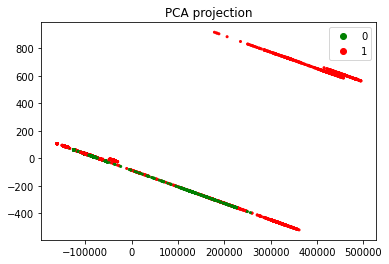

In [42]:
import sklearn.cluster
import sklearn.datasets
import sklearn.decomposition
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

pca = sklearn.decomposition.PCA(n_components=2)
compressed = pca.fit_transform(HostInputs)
colors = ListedColormap(['g','r'])
classes = [0,1]
plt.figure()
scatter = plt.scatter(compressed[:,0], compressed[:,1], c=HostTargets, cmap=colors, s=4)
plt.legend(handles=scatter.legend_elements()[0], labels=classes)
plt.title("PCA projection")
plt.show()



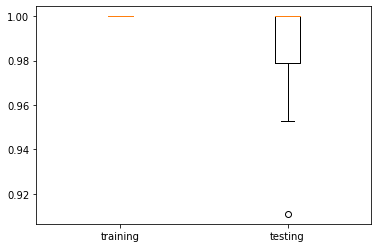

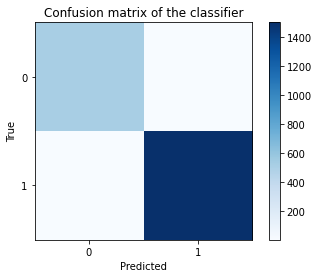

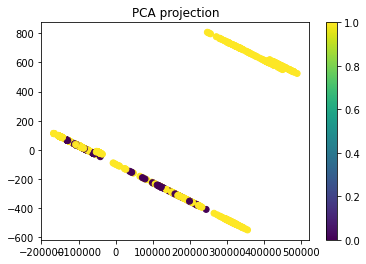

In [43]:
import sklearn
 

CV_results = cross_validate(RFclassifierHost, HostInputs, HostTargets.ravel(), cv=20,return_train_score=True)
training = CV_results["train_score"]
testing = CV_results["test_score"]
plt.boxplot([training, testing])
plt.xticks([1, 2], ['training', 'testing'])
plt.show()
labels = [0,1]
c = sklearn.metrics.confusion_matrix(Y_Host_test, Y_Pred_RFHost, labels=labels)
ax= plt.subplot()
plt.title('Confusion matrix of the classifier')
ax.set_xticks([0,1])
ax.set_yticks([0,1])
ax.set_xticklabels(labels)
ax.set_yticklabels(labels)
plt.xlabel('Predicted')
plt.ylabel('True')
cmap = plt.get_cmap('Blues')
im = plt.imshow(c, cmap=cmap, interpolation='nearest')
plt.colorbar(im)
plt.show()
pca = sklearn.decomposition.PCA(n_components=2)
compressed = pca.fit_transform(X_Host_test)
plt.figure()
plt.scatter(compressed[:,0], compressed[:,1], c=Y_Pred_RFHost, cmap="viridis")
plt.colorbar()
plt.title("PCA projection")
plt.show()

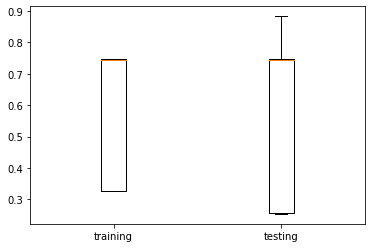

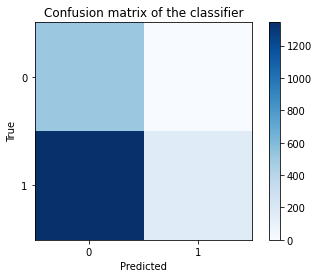

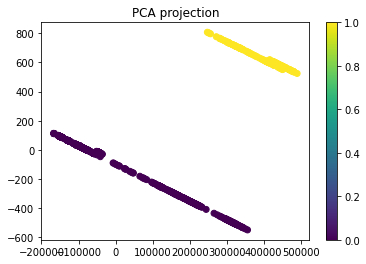

In [44]:
import sklearn
 

CV_results = cross_validate(MLPclassifierHost, HostInputs, HostTargets.ravel(), cv=20,return_train_score=True)
training = CV_results["train_score"]
testing = CV_results["test_score"]
plt.boxplot([training, testing])
plt.xticks([1, 2], ['training', 'testing'])
plt.show()
labels = [0,1]
c = sklearn.metrics.confusion_matrix(Y_Host_test, Y_Pred_MLPHost, labels=labels)
ax= plt.subplot()
plt.title('Confusion matrix of the classifier')
ax.set_xticks([0,1])
ax.set_yticks([0,1])
ax.set_xticklabels(labels)
ax.set_yticklabels(labels)
plt.xlabel('Predicted')
plt.ylabel('True')
cmap = plt.get_cmap('Blues')
im = plt.imshow(c, cmap=cmap, interpolation='nearest')
plt.colorbar(im)
plt.show()
pca = sklearn.decomposition.PCA(n_components=2)
compressed = pca.fit_transform(X_Host_test)
plt.figure()
plt.scatter(compressed[:,0], compressed[:,1], c=Y_Pred_MLPHost, cmap="viridis")
plt.colorbar()
plt.title("PCA projection")
plt.show()

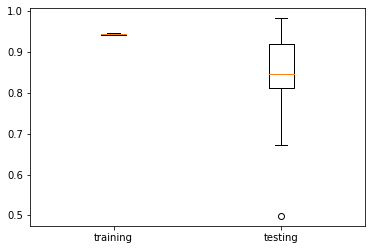

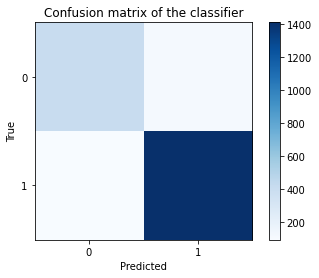

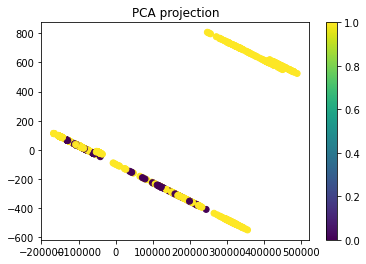

In [45]:
import sklearn
 

CV_results = cross_validate(KNNclassifierHost, HostInputs, HostTargets.ravel(), cv=20,return_train_score=True)
training = CV_results["train_score"]
testing = CV_results["test_score"]
plt.boxplot([training, testing])
plt.xticks([1, 2], ['training', 'testing'])
plt.show()
labels = [0,1]
c = sklearn.metrics.confusion_matrix(Y_Host_test, Y_Pred_KNNHost, labels=labels)
ax= plt.subplot()
plt.title('Confusion matrix of the classifier')
ax.set_xticks([0,1])
ax.set_yticks([0,1])
ax.set_xticklabels(labels)
ax.set_yticklabels(labels)
plt.xlabel('Predicted')
plt.ylabel('True')
cmap = plt.get_cmap('Blues')
im = plt.imshow(c, cmap=cmap, interpolation='nearest')
plt.colorbar(im)
plt.show()
pca = sklearn.decomposition.PCA(n_components=2)
compressed = pca.fit_transform(X_Host_test)
plt.figure()
plt.scatter(compressed[:,0], compressed[:,1], c=Y_Pred_RFHost, cmap="viridis")
plt.colorbar()
plt.title("PCA projection")
plt.show()

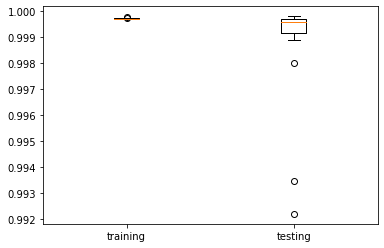

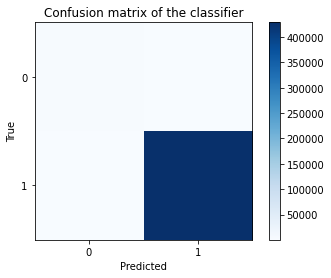

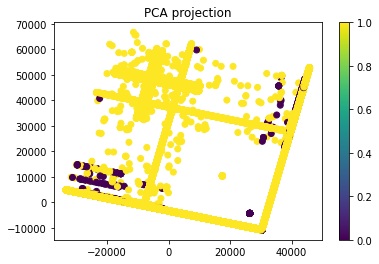

In [46]:
import sklearn
 

CV_results = cross_validate(RFclassifierNetFlow, NetFlowInputsCut, NetFlowTargets.ravel(), cv=20,return_train_score=True)
training = CV_results["train_score"]
testing = CV_results["test_score"]
plt.boxplot([training, testing])
plt.xticks([1, 2], ['training', 'testing'])
plt.show()
labels = [0,1]
c = sklearn.metrics.confusion_matrix(Y_test, Y_Pred_RFNetFlow, labels=labels)
ax= plt.subplot()
plt.title('Confusion matrix of the classifier')
ax.set_xticks([0,1])
ax.set_yticks([0,1])
ax.set_xticklabels(labels)
ax.set_yticklabels(labels)
plt.xlabel('Predicted')
plt.ylabel('True')
cmap = plt.get_cmap('Blues')
im = plt.imshow(c, cmap=cmap, interpolation='nearest')
plt.colorbar(im)
plt.show()
pca = sklearn.decomposition.PCA(n_components=2)
compressed = pca.fit_transform(X_test)
plt.figure()
plt.scatter(compressed[:,0], compressed[:,1], c=Y_Pred_RFNetFlow, cmap="viridis")
plt.colorbar()
plt.title("PCA projection")
plt.show()

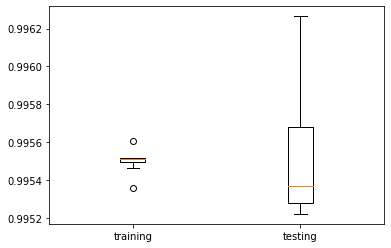

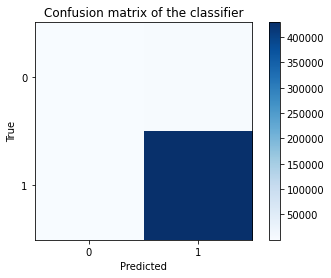

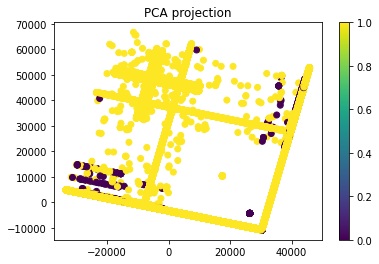

In [47]:
import sklearn
 

CV_results = cross_validate(MLPclassifierNetFlow, NetFlowInputsCut, NetFlowTargets.ravel(), cv=20,return_train_score=True)
training = CV_results["train_score"]
testing = CV_results["test_score"]
plt.boxplot([training, testing])
plt.xticks([1, 2], ['training', 'testing'])
plt.show()
labels = [0,1]
c = sklearn.metrics.confusion_matrix(Y_test, Y_Pred_MLPNetFlow, labels=labels)
ax= plt.subplot()
plt.title('Confusion matrix of the classifier')
ax.set_xticks([0,1])
ax.set_yticks([0,1])
ax.set_xticklabels(labels)
ax.set_yticklabels(labels)
plt.xlabel('Predicted')
plt.ylabel('True')
cmap = plt.get_cmap('Blues')
im = plt.imshow(c, cmap=cmap, interpolation='nearest')
plt.colorbar(im)
plt.show()
pca = sklearn.decomposition.PCA(n_components=2)
compressed = pca.fit_transform(X_test)
plt.figure()
plt.scatter(compressed[:,0], compressed[:,1], c=Y_Pred_RFNetFlow, cmap="viridis")
plt.colorbar()
plt.title("PCA projection")
plt.show()

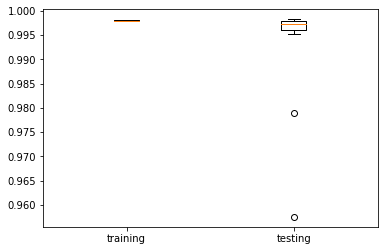

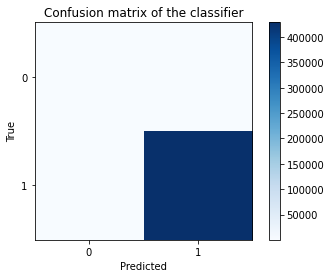

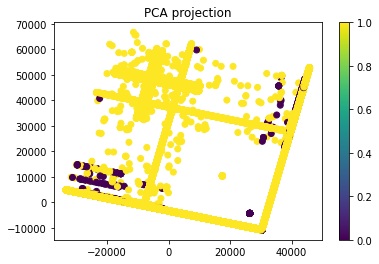

In [48]:
import sklearn
 

CV_results = cross_validate(KNNclassifierNetFlow, NetFlowInputsCut, NetFlowTargets.ravel(), cv=20,return_train_score=True)
training = CV_results["train_score"]
testing = CV_results["test_score"]
plt.boxplot([training, testing])
plt.xticks([1, 2], ['training', 'testing'])
plt.show()
labels = [0,1]
c = sklearn.metrics.confusion_matrix(Y_test, Y_Pred_KNNNetFlow, labels=labels)
ax= plt.subplot()
plt.title('Confusion matrix of the classifier')
ax.set_xticks([0,1])
ax.set_yticks([0,1])
ax.set_xticklabels(labels)
ax.set_yticklabels(labels)
plt.xlabel('Predicted')
plt.ylabel('True')
cmap = plt.get_cmap('Blues')
im = plt.imshow(c, cmap=cmap, interpolation='nearest')
plt.colorbar(im)
plt.show()
pca = sklearn.decomposition.PCA(n_components=2)
compressed = pca.fit_transform(X_test)
plt.figure()
plt.scatter(compressed[:,0], compressed[:,1], c=Y_Pred_RFNetFlow, cmap="viridis")
plt.colorbar()
plt.title("PCA projection")
plt.show()